<a href="https://colab.research.google.com/github/vkurpmax/Deep-Learning/blob/main/htchu/AUDL_W6_Notebook2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://i.ibb.co/qjt4Ymb/2022-09-19-004719.png" alt="2022-09-19-004719" border="0">

# AUDL-W6-Notebook2

# Getting Started with Images

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import cv2
print(f"OpenCV-Python Version {cv2.__version__}")

OpenCV-Python Version 4.6.0


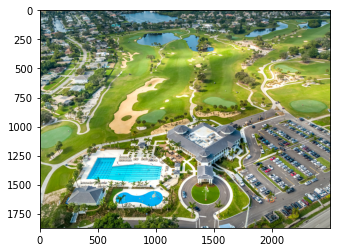

In [ ]:
from skimage import io
# reading the sample image from a url
image = io.imread('https://images.squarespace-cdn.com/content/v1/538cc2a9e4b069dee89c253a/1579005998536-M5YA7C8BWG4J6WONNE44/EdZakPhotoNPBCC5.jpg')
plt.imshow(image)
plt.show()

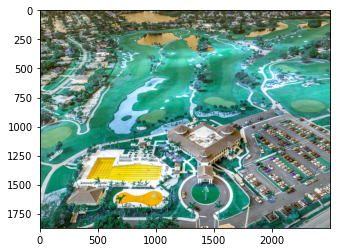

In [ ]:
# saving the image on the disk
io.imsave('image.jpg', image)

# loading the image from the disk
image = cv2.imread('image.jpg')

plt.imshow(image)
plt.show()

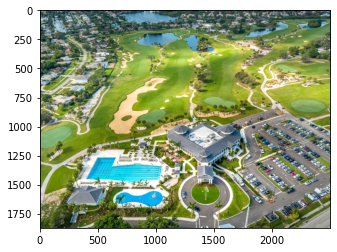

In [ ]:
# plt.imshow(img) shown an image with wrong colorspace. we should correct the colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

# Getting Started with Videos

```
import numpy as np
import cv2
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Display the resulting frame
    cv2.imshow('frame', gray)
    if cv2.waitKey(1) == ord('q'):
        break
# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

```

Ref: https://docs.opencv.org/4.x/dd/d43/tutorial_py_video_display.html

You can't open the webcam using OpenCV in Colab but you can use a Colab snippet to read the webcam:

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

NotReadableError: Could not start video source


In [ ]:
# image addition
img1 = io.imread('https://au360.asia.edu.tw/assets/images/1.jpg')
img2 = cv2.flip(img1, 1)

dst = cv2.addWeighted(img1,0.7,img2,0.3,0)

plt.imshow(dst)

In [ ]:
# Dilation
kernel = np.ones((7,7),np.uint8)
dilation = cv2.dilate(img,kernel,iterations = 1)

plt.imshow(cv2.cvtColor(dilation, cv2.COLOR_BGR2RGB))

# Histograms

Ref: https://docs.opencv.org/4.x/de/db2/tutorial_py_table_of_contents_histograms.html

You can use OpenCV or numpy to calculate Histogram. Here we use numpy for Histogram calculation.

In [ ]:
img = image.copy()

plt.figure()
plt.imshow(img)
plt.title('Photo'), plt.xticks([]), plt.yticks([])
plt.figure()
plt.hist(img.ravel(),256,[0,256])
plt.title('Gray and RGB Histogram'), plt.xticks([]), plt.yticks([])
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In [ ]:
img = io.imread('https://au360.asia.edu.tw/assets/images/4.jpg')

plt.figure()
plt.imshow(img)
plt.title('Photo'), plt.xticks([]), plt.yticks([])
plt.figure()
plt.hist(img.ravel(),256,[0,256])
plt.title('Gray and RGB Histogram'), plt.xticks([]), plt.yticks([])
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()